In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### K - means algorithm

The K-means algorithm is a method to automatically cluster similar
data points together. 

* Concretely, you are given a training set $\{x^{(1)}, ..., x^{(m)}\}$, and you want
to group the data into a few cohesive “clusters”. 


* K-means is an iterative procedure that
     * Starts by guessing the initial centroids, and then 
     * Refines this guess by 
         * Repeatedly assigning examples to their closest centroids, and then 
         * Recomputing the centroids based on the assignments.
         

* In pseudocode, the K-means algorithm is as follows:

    ``` python
    # Initialize centroids
    # K is the number of clusters
    centroids = kMeans_init_centroids(X, K)
    
    for iter in range(iterations):
        # Cluster assignment step: 
        # Assign each data point to the closest centroid. 
        # idx[i] corresponds to the index of the centroid 
        # assigned to example i
        idx = find_closest_centroids(X, centroids)

        # Move centroid step: 
        # Compute means based on centroid assignments
        centroids = compute_means(X, idx, K)
    ```

* The inner-loop of the algorithm repeatedly carries out two steps: 
    * (i) Assigning each training example $x^{(i)}$ to its closest centroid, and
    * (ii) Recomputing the mean of each centroid using the points assigned to it. 
    
    
* The $K$-means algorithm will always converge to some final set of means for the centroids. 

* However, that the converged solution may not always be ideal and depends on the initial setting of the centroids.
    * Therefore, in practice the K-means algorithm is usually run a few times with different random initializations. 
    * One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion).

1.1 Finding closest centroids

In the “cluster assignment” phase of the K-means algorithm, the
algorithm assigns every training example $x^{(i)}$ to its closest
centroid, given the current positions of centroids. 

Your task is to complete the code in `find_closest_centroids`. 
* This function takes the data matrix `X` and the locations of all
centroids inside `centroids` 
* It should output a one-dimensional array `idx` (which has the same number of elements as `X`) that holds the index  of the closest centroid (a value in $\{1,...,K\}$, where $K$ is total number of centroids) to every training example .
* Specifically, for every example $x^{(i)}$ we set
$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2,$$
where 
 * $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ (corresponds to `idx[i]` in the starter code), and 
 * $\mu_j$ is the position (value) of the $j$’th centroid. (stored in `centroids` in the starter code)

In [2]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): k centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """
    m = X.shape[0] # number of examples
    idx = np.zeros(m, dtype=int) # shape is (m,)
    
    for i in range(m):
      # distances = np.linalg.norm(centroids - X[i, :], axis=1) # shape is (k,) less optimized due to square root overhead in L2 norm
      distances =  np.sum(np.square(centroids - X[i, :]), axis=1) # shape is (k,)
      idx[i] = np.argmin(distances) # 0 based indexing of centroids position
    return idx

In [3]:
X = np.load("data/data-kmeans.npy")
print(X[:5])
print(X.shape)

[[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
(300, 2)


In [4]:
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]]) # 3 centroids

idx = find_closest_centroids(X, initial_centroids)
print(idx[:5])
print(idx.shape)

[0 2 1 0 0]
(300,)


In [5]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    m, n = X.shape
    centroids = np.zeros((K, n))
    
    for k in range(K):
        centroids[k, :] = np.mean(X[idx == k, :], axis=0)
    
    return centroids
  

In [6]:
K = 3 
centroids = compute_centroids(X, idx, K)
print(f"centroids:\n {centroids}")

centroids:
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [7]:
from unsup_utils import plot_progress_kMeans

In [8]:
# You do not need to implement anything for this part

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    
    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


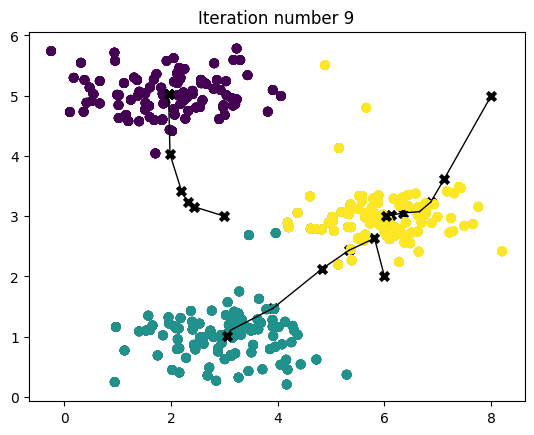

In [9]:
X = np.load('data/data-kmeans.npy')

initial_centroids = np.array([[3,3], [6, 2], [8,5]])
K = 3
max_iters = 10
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

#### Random initialization of cluster centroids

In practice, a good strategy for initializing the centroids is to select random examples from the training set.

In [10]:
def KMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    # randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # select first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

#### Image compression with K-means

In this exercise, you will apply K-means to image compression. 

* In a straightforward 24-bit color representation of an image$^{2}$, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
* Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of
colors to 16 colors.
* By making this reduction, it is possible to represent (compress) the photo in an efficient way. 
* Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).

In this part, you will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image.
* Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space. 
* Once you have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.


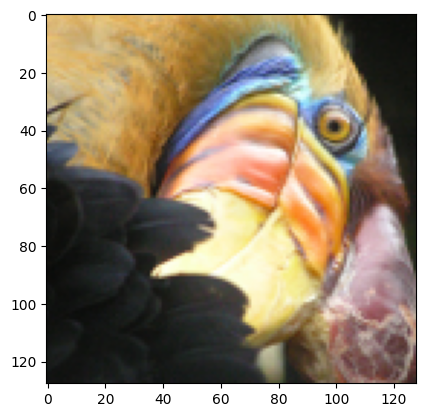

In [11]:
img = plt.imread('data/bird_small.png')
plt.imshow(img)
plt.show()

In [12]:
print("Shape of original_img is:", img.shape)

Shape of original_img is: (128, 128, 3)


As you can see, this creates a three-dimensional matrix `original_img` where 
* the first two indices identify a pixel position, and
* the third index represents red, green, or blue. 

For example, `original_img[50, 33, 2]` gives the blue intensity of the pixel at row 50 and column 33.

Processing data

To call the `run_kMeans`, you need to first transform the matrix `original_img` into a two-dimensional matrix.

* The code below reshapes the matrix `original_img` to create an $m \times 3$ matrix of pixel colors (where
$m=16384 = 128\times128$)

In [13]:
# normalize the image matrix (all pixel intensity values are in range 0 - 1)
img = img / 255

X_img = np.reshape(img, (img.shape[0]*img.shape[1], 3))

In [14]:
K = 16                       
max_iters = 10               

# Using the function you have implemented above. 
initial_centroids = KMeans_init_centroids(X_img, K) 

# Run K-Means - this takes a couple of minutes
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters) 

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [15]:
print(f"shape of idx: {idx.shape}")
print(f"closest centroid for the first five elements: f{idx[:5]}")

shape of idx: (16384,)
closest centroid for the first five elements: f[11 11 11 11 11]


#### compress the image

After finding the top $K=16$ colors to represent the image, you can now
assign each pixel position to its closest centroid using the
`find_closest_centroids` function. 
* This allows you to represent the original image using the centroid assignments of each pixel. 
* Notice that you have significantly reduced the number of bits that are required to describe the image. 
    * The original image required 24 bits for each one of the $128\times128$ pixel locations, resulting in total size of $128 \times 128 \times 24 = 393,216$ bits. 
    * The new representation requires some overhead storage in form of a dictionary of 16 colors, each of which require 24 bits, but the image itself then only requires 4 bits per pixel location. 
    * The final number of bits used is therefore $16 \times 24 + 128 \times 128 \times 4 = 65,920$ bits, which corresponds to compressing the original image by about a factor of 6.

In [16]:
# represent image in terms of indices
X_recovered = centroids[idx, :]

# reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, img.shape)

Finally, you can view the effects of the compression by reconstructing
the image based only on the centroid assignments. 
* Specifically, you can replace each pixel location with the mean of the centroid assigned to
it. 
* Figure 3 shows the reconstruction we obtained. Even though the resulting image retains most of the characteristics of the original, we also see some compression artifacts.

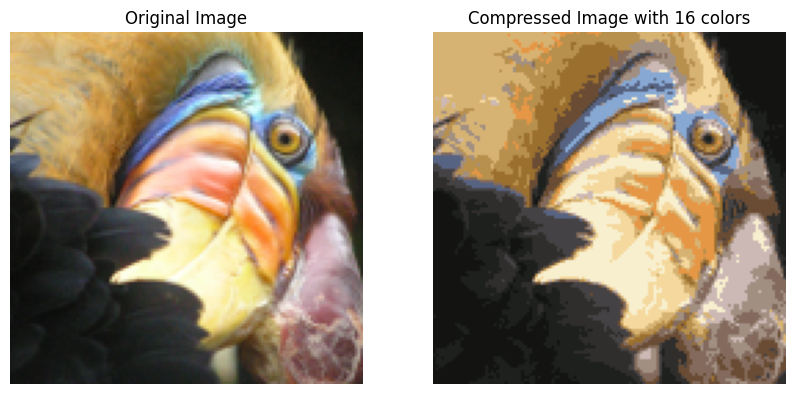

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (10, 8))
plt.axis('off')

ax[0].imshow(img*255)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed Image with %d colors' %K)
ax[1].axis('off')

plt.show()

### anamoly detection

In this exercise, you will implement an anomaly detection algorithm to
detect anomalous behavior in server computers.

The dataset contains two features - 
   * throughput (mb/s) and 
   * latency (ms) of response of each server.

While your servers were operating, you collected $m=307$ examples of how they were behaving, and thus have an unlabeled dataset $\{x^{(1)}, \ldots, x^{(m)}\}$. 
* You suspect that the vast majority of these examples are “normal” (non-anomalous) examples of the servers operating normally, but there might also be some examples of servers acting anomalously within this dataset.

You will use a Gaussian model to detect anomalous examples in your
dataset. 
* You will first start on a 2D dataset that will allow you to visualize what the algorithm is doing.
* On that dataset you will fit a Gaussian distribution and then find values that have very low probability and hence can be considered anomalies. 
* After that, you will apply the anomaly detection algorithm to a larger dataset with many dimensions. 

You will start by loading the dataset for this task. 
- The `load_data()` function shown below loads the data into the variables `X_train`, `X_val` and `y_val` 
    - You will use `X_train` to fit a Gaussian distribution 
    - You will use `X_val` and `y_val` as a cross validation set to select a threshold and determine anomalous vs normal examples


In [18]:
from utils_anamoly import load_data, load_data_multi

In [19]:
X_train, X_val, y_val = load_data() 
#TODO: if this is unsupervised, then why y_val is there?

In [20]:
print("first 5 elements of X_train are:\n", X_train[:5])
print("\n")
print("first 5 elements of X_val are:\n", X_val[:5])
print("\n")
print("first 5 elements of y_val are:\n", y_val[:5])

first 5 elements of X_train are:
 [[13.04681517 14.74115241]
 [13.40852019 13.7632696 ]
 [14.19591481 15.85318113]
 [14.91470077 16.17425987]
 [13.57669961 14.04284944]]


first 5 elements of X_val are:
 [[15.79025979 14.9210243 ]
 [13.63961877 15.32995521]
 [14.86589943 16.47386514]
 [13.58467605 13.98930611]
 [13.46404167 15.63533011]]


first 5 elements of y_val are:
 [0 0 0 0 0]


In [21]:
print("shape of X_train: ", X_train.shape)
print("shape of X_val: ", X_val.shape)
print("shape of y_val: ", y_val.shape)

shape of X_train:  (307, 2)
shape of X_val:  (307, 2)
shape of y_val:  (307,)


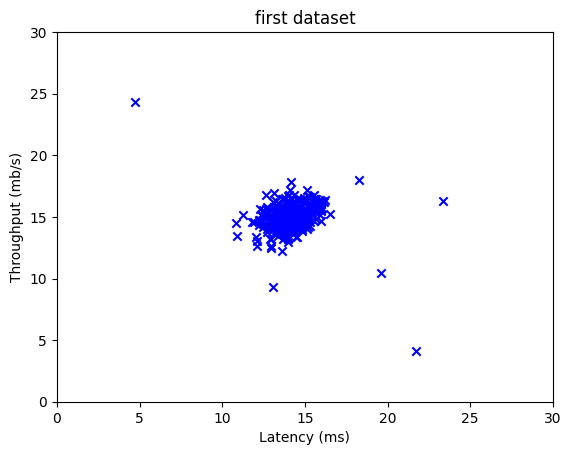

In [22]:
# plot the dataset
plt.scatter(X_train[:,0], X_train[:,1], c='blue', marker='x', label='Train')
plt.title("first dataset")
plt.ylabel("Throughput (mb/s)")
plt.xlabel("Latency (ms)")
plt.axis([0, 30, 0, 30])
plt.show()

#### Gaussian distribution

To perform anomaly detection, you will first need to fit a model to the data’s distribution.

* Given a training set $\{x^{(1)}, ..., x^{(m)}\}$ you want to estimate the Gaussian distribution for each of the features $x_i$. 

* Recall that the Gaussian distribution is given by

   $$ p(x ; \mu,\sigma ^2) = \frac{1}{\sqrt{2 \pi \sigma ^2}}\exp^{ - \frac{(x - \mu)^2}{2 \sigma ^2} }$$

   where $\mu$ is the mean and $\sigma^2$ controls the variance.
   
* For each feature $i = 1\ldots n$, you need to find parameters $\mu_i$ and $\sigma_i^2$ that fit the data in the $i$-th dimension $\{x_i^{(1)}, ..., x_i^{(m)}\}$ (the $i$-th dimension of each example).

Please complete the `estimate_gaussian` function below to calculate `mu` (mean for each feature in `X`)and `var` (variance for each feature in `X`). 

You can estimate the parameters, ($\mu_i$, $\sigma_i^2$), of the $i$-th
feature by using the following equations. To estimate the mean, you will
use:

$$\mu_i = \frac{1}{m} \sum_{j=1}^m x_i^{(j)}$$

and for the variance you will use:
$$\sigma_i^2 = \frac{1}{m} \sum_{j=1}^m (x_i^{(j)} - \mu_i)^2$$

In [23]:
def estimate_gaussian(X):
    """
    Calculates mean and variance of all features 
    in the dataset
    Input:
        X: (ndarray): (m, n): Data matrix
    Returns:
        mu: (ndarray): (n,): Mean of all features
        var: (ndarray): (n,): Variance of all features
    """
    # m, n = X.shape
    mu = np.mean(X, axis=0) # shape is (n,) or 1/m * np.sum(X, axis=0)
    var = np.var(X, axis=0) # shape is (n,) or 1/m * np.sum((X-mu)**2, axis=0)
    return mu, var
    
    


In [24]:
mu, var = estimate_gaussian(X_train)

print("mean of each feature:", mu)
print("variance of each feature:", var)

mean of each feature: [14.11222578 14.99771051]
variance of each feature: [1.83263141 1.70974533]


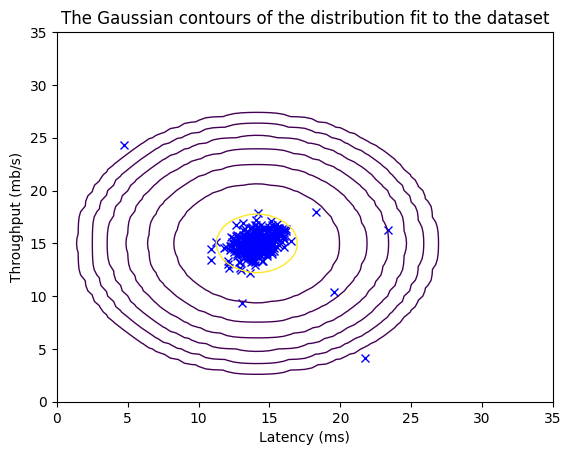

In [25]:
from utils_anamoly import visualize_fit, multivariate_gaussian

# Returns the density of the multivariate normal
# at each data point (row) of X_train
p = multivariate_gaussian(X_train, mu, var)
# TODO: understand working of multivariate_gaussian

#Plotting code 
visualize_fit(X_train, mu, var)

see that most of the examples are in the region with the highest probability, while the anomalous examples are in the regions with lower probabilities.

In [26]:
p.shape

(307,)

#### Selecting the threshold $\epsilon$

Now that you have estimated the Gaussian parameters, you can investigate which examples have a very high probability given this distribution and which examples have a very low probability.  

* The low probability examples are more likely to be the anomalies in our dataset. 
* One way to determine which examples are anomalies is to select a threshold based on a cross validation set. 

In this section, you will code in `select_threshold` to select the threshold $\varepsilon$ using the $F_1$ score on a cross validation set.

* For this, we will use a cross validation set
$\{(x_{\rm cv}^{(1)}, y_{\rm cv}^{(1)}),\ldots, (x_{\rm cv}^{(m_{\rm cv})}, y_{\rm cv}^{(m_{\rm cv})})\}$, where the label $y=1$ corresponds to an anomalous example, and $y=0$ corresponds to a normal example. 
* For each cross validation example, we will compute $p(x_{\rm cv}^{(i)})$. The vector of all of these probabilities $p(x_{\rm cv}^{(1)}), \ldots, p(x_{\rm cv}^{(m_{\rm cv)}})$ is passed to `select_threshold` in the vector `p_val`. 
* The corresponding labels $y_{\rm cv}^{(1)}, \ldots, y_{\rm cv}^{(m_{\rm cv)}}$ is passed to the same function in the vector `y_val`.


Please complete the `select_threshold` function below to find the best threshold to use for selecting outliers based on the results from a validation set (`p_val`) and the ground truth (`y_val`). 

* In the provided code `select_threshold`, there is already a loop that will try many different values of $\varepsilon$ and select the best $\varepsilon$ based on the $F_1$ score. 

* You need implement code to calculate the F1 score from choosing `epsilon` as the threshold and place the value in `F1`. 

  * Recall that if an example $x$ has a low probability $p(x) < \varepsilon$, then it is classified as an anomaly. 
        
  * Then, you can compute precision and recall by: 
   $$\begin{aligned}
   prec&=&\frac{tp}{tp+fp}\\
   rec&=&\frac{tp}{tp+fn},
   \end{aligned}$$ 
   
   where
    * $tp$ is the number of true positives: the ground truth label says it’s an anomaly and our algorithm correctly classified it as an anomaly.
    * $fp$ is the number of false positives: the ground truth label says it’s not an anomaly, but our algorithm incorrectly classified it as an anomaly.
    * $fn$ is the number of false negatives: the ground truth label says it’s an anomaly, but our algorithm incorrectly classified it as not being anomalous.

  * The $F_1$ score is computed using precision ($prec$) and recall ($rec$) as follows:
    $$F_1 = \frac{2\cdot prec \cdot rec}{prec + rec}$$ 

**Implementation Note:** 
In order to compute $tp$, $fp$ and $fn$, you may be able to use a vectorized implementation rather than loop over all the examples.

In [27]:
def select_threshold(y_val, p_val):
    """
    Finds the best threshold to use for selecting outliers 
    based on the results from a validation set (p_val) 
    and the ground truth (y_val)
    
    Args:
        y_val (ndarray): Ground truth on validation set
        p_val (ndarray): Results on validation set
        
    Returns:
        epsilon (float): Threshold chosen 
        F1 (float):      F1 score by choosing epsilon as threshold
    """ 
    best_epsilon = 0
    best_F1 = 0
    F1 = 0
    
    stepsize = (max(p_val) - min(p_val))/ 1000
    
    for epsilon in np.arange(min(p_val), max(p_val), stepsize):
      predictions = (p_val < epsilon) # 1 is anamoly, 0 is normal
      tp = np.sum((predictions == 1) & (y_val == 1))
      fp = np.sum((predictions ==1) & (y_val == 0))
      fn = np.sum((predictions == 0) & (y_val == 1))
      
      # division by zero check
      prec = tp / (tp + fp) if (tp + fp) > 0 else 0
      rec = tp / (tp + fn) if (tp + fn) > 0 else 0

      F1 = 2 * prec * rec / (prec + rec) if (prec + rec) > 0 else 0
      if F1 > best_F1:
        best_F1 = F1
        best_epsilon = epsilon
    return best_epsilon, best_F1
  

In [28]:
p_val = multivariate_gaussian(X_val, mu, var)
epsilon, F1 = select_threshold(y_val, p_val)

print('Best epsilon found using cross-validation: %e' % epsilon)
print('Best F1 on Cross Validation Set: %f' % F1)

Best epsilon found using cross-validation: 8.990853e-05
Best F1 on Cross Validation Set: 0.875000


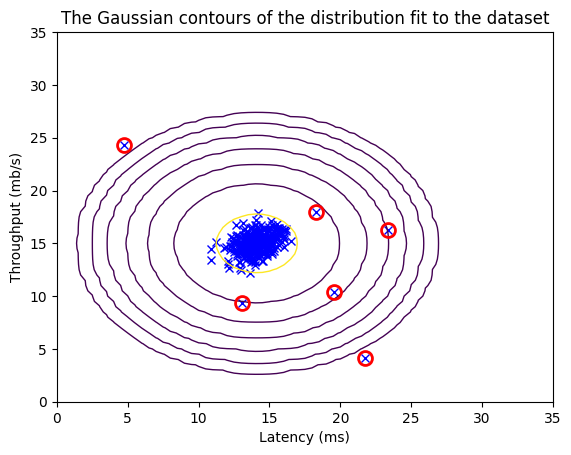

In [29]:
outliers = p < epsilon

# visualization of fit
visualize_fit(X_train, mu, var)

# draw a red circle around these outliers
plt.plot(X_train[outliers,0], X_train[outliers, 1], 'ro', markersize=10, markerfacecolor='none', markeredgewidth=2)

#### High dimensional dataset

Now,  we will run the anomaly detection algorithm that you implemented on a more realistic and much harder dataset.

In this dataset, each example is described by 11 features, capturing many more properties of your compute servers.

Let's start by loading the dataset.

- The `load_data()` function shown below loads the data into variables `X_train_high`, `X_val_high` and `y_val_high`
    -  `_high` is meant to distinguish these variables from the ones used in the previous part
    - We will use `X_train_high` to fit Gaussian distribution 
    - We will use `X_val_high` and `y_val_high` as a cross validation set to select a threshold and determine anomalous vs normal examples

In [30]:
X_train_high, X_val_high, y_val_high = load_data_multi()

In [31]:
print ('The shape of X_train_high is:', X_train_high.shape)
print ('The shape of X_val_high is:', X_val_high.shape)
print ('The shape of y_val_high is: ', y_val_high.shape)

The shape of X_train_high is: (1000, 11)
The shape of X_val_high is: (100, 11)
The shape of y_val_high is:  (100,)


Now, let's run the anomaly detection algorithm on this new dataset.

The code below will use your code to 
* Estimate the Gaussian parameters ($\mu_i$ and $\sigma_i^2$)
* Evaluate the probabilities for both the training data `X_train_high` from which you estimated the Gaussian parameters, as well as for the the cross-validation set `X_val_high`. 
* Finally, it will use `select_threshold` to find the best threshold $\varepsilon$. 

In [32]:
# estimate guassian parameters
mu_high, var_high = estimate_gaussian(X_train_high)

# evaluate probabilities for training set
p_high = multivariate_gaussian(X_train_high, mu_high, var_high)

# evaluate probabilities for cross validation set
p_val_high = multivariate_gaussian(X_val_high, mu_high, var_high)

# find best threshold
epsilon_high, F1_high = select_threshold(y_val_high, p_val_high)

print(f"best epsilon found using cross-validation: {epsilon_high}")
print(f"best F1 on Cross Validation Set: {F1_high}")
print(f"number of anomalies found: {sum(p_high < epsilon_high)}")

best epsilon found using cross-validation: 1.377228890761358e-18
best F1 on Cross Validation Set: 0.6153846153846154
number of anomalies found: 117


#### collaborative filtering - for recommendation systems


#### Notation and Descriptions

| General Notation | Description | Python (if any) |
|:----------------|:------------------------------------------------------------|:------------|
| $r(i,j)$       | Scalar; = 1 if user $j$ rated game $i$, = 0 otherwise       | |
| $y(i,j)$       | Scalar; rating given by user $j$ on game $i$ (if $r(i,j) = 1$ is defined) | |
| $\mathbf{w}^{(j)}$ | Vector; parameters for user $j$ | |
| $b^{(j)}$      | Scalar; parameter for user $j$ | |
| $\mathbf{x}^{(i)}$ | Vector; feature ratings for movie $i$ | |     
| $n_u$         | Number of users | `num_users` |
| $n_m$         | Number of movies | `num_movies` |
| $n$           | Number of features | `num_features` |
| $\mathbf{X}$  | Matrix of vectors $\mathbf{x}^{(i)}$ | `X` |
| $\mathbf{W}$  | Matrix of vectors $\mathbf{w}^{(j)}$ | `W` |
| $\mathbf{b}$  | Vector of bias parameters $b^{(j)}$ | `b` |
| $\mathbf{R}$  | Matrix of elements $r(i,j)$ | `R` |


In this lab, you will implement the collaborative filtering learning algorithm and apply it to a dataset of movie ratings.
The goal of a collaborative filtering recommender system is to generate two vectors: For each user, a 'parameter vector' that embodies the movie tastes of a user. For each movie, a feature vector of the same size which embodies some description of the movie. The dot product of the two vectors plus the bias term should produce an estimate of the rating the user might give to that movie.

The diagram below details how these vectors are learned.

<figure>
   <img src="./images/ColabFilterLearn.PNG"  style="width:740px;height:250px;" >
</figure>

Existing ratings are provided in matrix form as shown. $Y$ contains ratings; 0.5 to 5 inclusive in 0.5 steps. 0 if the movie has not been rated. $R$ has a 1 where movies have been rated. Movies are in rows, users in columns. Each user has a parameter vector $w^{user}$ and bias. Each movie has a feature vector $x^{movie}$. These vectors are simultaneously learned by using the existing user/movie ratings as training data. One training example is shown above: $\mathbf{w}^{(1)} \cdot \mathbf{x}^{(1)} + b^{(1)} = 4$. It is worth noting that the feature vector $x^{movie}$ must satisfy all the users while the user vector $w^{user}$ must satisfy all the movies. This is the source of the name of this approach - all the users collaborate to generate the rating set. 

<figure>
   <img src="./images/ColabFilterUse.PNG"  style="width:640px;height:250px;" >
</figure>

Once the feature vectors and parameters are learned, they can be used to predict how a user might rate an unrated movie. This is shown in the diagram above. The equation is an example of predicting a rating for user one on movie zero.


In this exercise, you will implement the function `cofiCostFunc` that computes the collaborative filtering
objective function. After implementing the objective function, you will use a TensorFlow custom training loop to learn the parameters for collaborative filtering. The first step is to detail the data set and data structures that will be used in the lab.

The original dataset has  9000 movies rated by 600 users. The dataset has been reduced in size to focus on movies from the years since 2000. This dataset consists of ratings on a scale of 0.5 to 5 in 0.5 step increments. The reduced dataset has $n_u = 443$ users, and $n_m= 4778$ movies. 

Below, you will load the movie dataset into the variables $Y$ and $R$.

The matrix $Y$ (a  $n_m \times n_u$ matrix) stores the ratings $y^{(i,j)}$. The matrix $R$ is an binary-valued indicator matrix, where $R(i,j) = 1$ if user $j$ gave a rating to movie $i$, and $R(i,j)=0$ otherwise. 

Throughout this part of the exercise, you will also be working with the
matrices, $\mathbf{X}$, $\mathbf{W}$ and $\mathbf{b}$: 

$$\mathbf{X} = 
\begin{bmatrix}
--- (\mathbf{x}^{(0)})^T --- \\
--- (\mathbf{x}^{(1)})^T --- \\
\vdots \\
--- (\mathbf{x}^{(n_m-1)})^T --- \\
\end{bmatrix} , \quad
\mathbf{W} = 
\begin{bmatrix}
--- (\mathbf{w}^{(0)})^T --- \\
--- (\mathbf{w}^{(1)})^T --- \\
\vdots \\
--- (\mathbf{w}^{(n_u-1)})^T --- \\
\end{bmatrix},\quad
\mathbf{ b} = 
\begin{bmatrix}
 b^{(0)}  \\
 b^{(1)} \\
\vdots \\
b^{(n_u-1)} \\
\end{bmatrix}\quad
$$ 

The $i$-th row of $\mathbf{X}$ corresponds to the
feature vector $x^{(i)}$ for the $i$-th movie, and the $j$-th row of
$\mathbf{W}$ corresponds to one parameter vector $\mathbf{w}^{(j)}$, for the
$j$-th user. Both $x^{(i)}$ and $\mathbf{w}^{(j)}$ are $n$-dimensional
vectors. For the purposes of this exercise, you will use $n=10$, and
therefore, $\mathbf{x}^{(i)}$ and $\mathbf{w}^{(j)}$ have 10 elements.
Correspondingly, $\mathbf{X}$ is a
$n_m \times 10$ matrix and $\mathbf{W}$ is a $n_u \times 10$ matrix.

We will start by loading the movie ratings dataset to understand the structure of the data.
We will load $Y$ and $R$ with the movie dataset.  
We'll also load $\mathbf{X}$, $\mathbf{W}$, and $\mathbf{b}$ with pre-computed values. These values will be learned later in the lab, but we'll use pre-computed values to develop the cost model.

In [33]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from recsys_utils import *

2025-03-26 19:19:09.931477: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-26 19:19:09.968958: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742996950.016095   47647 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742996950.031917   47647 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742996950.072472   47647 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [34]:
#Load data
X, W, b, num_movies, num_features, num_users = load_precalc_params_small()
Y, R = load_ratings_small()

print("Y", Y.shape, "R", R.shape)
print("X", X.shape)
print("W", W.shape)
print("b", b.shape)
print("num_features", num_features)
print("num_movies",   num_movies)
print("num_users",    num_users)

Y (4778, 443) R (4778, 443)
X (4778, 10)
W (443, 10)
b (1, 443)
num_features 10
num_movies 4778
num_users 443


In [35]:
# average rating
tsmean = np.mean(Y[0, R[0,:].astype(bool)])
print(f"average rating for movies: {tsmean:0.3f} / 5")

average rating for movies: 3.400 / 5


#### Collaborative filtering learning algorithm

Now, you will begin implementing the collaborative filtering learning
algorithm. You will start by implementing the objective function. 

The collaborative filtering algorithm in the setting of movie
recommendations considers a set of $n$-dimensional parameter vectors
$\mathbf{x}^{(0)},...,\mathbf{x}^{(n_m-1)}$, $\mathbf{w}^{(0)},...,\mathbf{w}^{(n_u-1)}$ and $b^{(0)},...,b^{(n_u-1)}$, where the
model predicts the rating for movie $i$ by user $j$ as
$y^{(i,j)} = \mathbf{w}^{(j)}\cdot \mathbf{x}^{(i)} + b^{(i)}$ . Given a dataset that consists of
a set of ratings produced by some users on some movies, you wish to
learn the parameter vectors $\mathbf{x}^{(0)},...,\mathbf{x}^{(n_m-1)},
\mathbf{w}^{(0)},...,\mathbf{w}^{(n_u-1)}$  and $b^{(0)},...,b^{(n_u-1)}$ that produce the best fit (minimizes
the squared error).

You will complete the code in cofiCostFunc to compute the cost
function for collaborative filtering. 

#### Collaborative filtering cost function

The collaborative filtering cost function is given by
$$J({\mathbf{x}^{(0)},...,\mathbf{x}^{(n_m-1)},\mathbf{w}^{(0)},b^{(0)},...,\mathbf{w}^{(n_u-1)},b^{(n_u-1)}})= \frac{1}{2}\sum_{(i,j):r(i,j)=1}(\mathbf{w}^{(j)} \cdot \mathbf{x}^{(i)} + b^{(j)} - y^{(i,j)})^2
+\underbrace{
\frac{\lambda}{2}
\sum_{j=0}^{n_u-1}\sum_{k=0}^{n-1}(\mathbf{w}^{(j)}_k)^2
+ \frac{\lambda}{2}\sum_{i=0}^{n_m-1}\sum_{k=0}^{n-1}(\mathbf{x}_k^{(i)})^2
}_{regularization}
\tag{1}$$
The first summation in (1) is "for all $i$, $j$ where $r(i,j)$ equals $1$" and could be written:

$$
= \frac{1}{2}\sum_{j=0}^{n_u-1} \sum_{i=0}^{n_m-1}r(i,j)*(\mathbf{w}^{(j)} \cdot \mathbf{x}^{(i)} + b^{(j)} - y^{(i,j)})^2
+\text{regularization}
$$

You should now write cofiCostFunc (collaborative filtering cost function) to return this cost.

**For loop Implementation:**   
Start by implementing the cost function using for loops.
Consider developing the cost function in two steps. First, develop the cost function without regularization. A test case that does not include regularization is provided below to test your implementation. Once that is working, add regularization and run the tests that include regularization.  Note that you should be accumulating the cost for user $j$ and movie $i$ only if $R(i,j) = 1$.

In [36]:

def cofi_cost_func(X, W, b, Y, R, lambda_):
    """
    Returns the cost for the content-based filtering
    Args:
      X (ndarray (num_movies,num_features)): matrix of item features
      W (ndarray (num_users,num_features)) : matrix of user parameters
      b (ndarray (1, num_users)            : vector of user parameters
      Y (ndarray (num_movies,num_users)    : matrix of user ratings of movies
      R (ndarray (num_movies,num_users)    : matrix, where R(i, j) = 1 if the i-th movies was rated by the j-th user
      lambda_ (float): regularization parameter
    Returns:
      J (float) : Cost
    """
    nm, nu = Y.shape
    J = 0
   
    for j in range(nu):
        w = W[j,:]
        b_j = b[0,j]
        
        for i in range(nm):
            x = X[i,:]
            y = Y[i,j]
            r = R[i,j]
            J += np.square(r * (np.dot(w,x) + b_j - y ))
        
    J += lambda_* (np.sum(np.square(W)) + np.sum(np.square(X)))
    
    J = J/2

    return J

In [38]:
# Public tests
from public_tests_unsup import test_cofi_cost_func
test_cofi_cost_func(cofi_cost_func)

All tests passed!


In [39]:
# Reduce the data set size so that this runs faster
num_users_r = 4
num_movies_r = 5 
num_features_r = 3

X_r = X[:num_movies_r, :num_features_r]
W_r = W[:num_users_r,  :num_features_r]
b_r = b[0, :num_users_r].reshape(1,-1)
Y_r = Y[:num_movies_r, :num_users_r]
R_r = R[:num_movies_r, :num_users_r]

# Evaluate cost function
J = cofi_cost_func(X_r, W_r, b_r, Y_r, R_r, 0);
print(f"Cost: {J:0.2f}")

Cost: 13.67


In [40]:
# Evaluate cost function with regularization 
J = cofi_cost_func(X_r, W_r, b_r, Y_r, R_r, 1.5);
print(f"Cost (with regularization): {J:0.2f}")

Cost (with regularization): 28.09


**Vectorized Implementation**

It is important to create a vectorized implementation to compute $J$, since it will later be called many times during optimization. The linear algebra utilized is not the focus of this series, so the implementation is provided. If you are an expert in linear algebra, feel free to create your version without referencing the code below. 

Run the code below and verify that it produces the same results as the non-vectorized version.

In [41]:
def cofi_cost_func_v(X, W, b, Y, R, lambda_):
    """
    Returns the cost for the content-based filtering
    Vectorized for speed. Uses tensorflow operations to be compatible with custom training loop.
    Args:
      X (ndarray (num_movies,num_features)): matrix of item features
      W (ndarray (num_users,num_features)) : matrix of user parameters
      b (ndarray (1, num_users)            : vector of user parameters
      Y (ndarray (num_movies,num_users)    : matrix of user ratings of movies
      R (ndarray (num_movies,num_users)    : matrix, where R(i, j) = 1 if the i-th movies was rated by the j-th user
      lambda_ (float): regularization parameter
    Returns:
      J (float) : Cost
    """
    j = (tf.linalg.matmul(X, tf.transpose(W)) + b - Y)*R
    J = 0.5 * tf.reduce_sum(j**2) + (lambda_/2) * (tf.reduce_sum(X**2) + tf.reduce_sum(W**2))
    return J

In [42]:
# Evaluate cost function
J = cofi_cost_func_v(X_r, W_r, b_r, Y_r, R_r, 0);
print(f"Cost: {J:0.2f}")

# Evaluate cost function with regularization 
J = cofi_cost_func_v(X_r, W_r, b_r, Y_r, R_r, 1.5);
print(f"Cost (with regularization): {J:0.2f}")

Cost: 13.67
Cost (with regularization): 28.09


2025-03-26 19:21:52.472710: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


#### Learning movie recommendations
------------------------------

After you have finished implementing the collaborative filtering cost
function, you can start training your algorithm to make
movie recommendations for yourself. 

In the cell below, you can enter your own movie choices. The algorithm will then make recommendations for you! We have filled out some values according to our preferences, but after you have things working with our choices, you should change this to match your tastes.
A list of all movies in the dataset is in the file [movie list](data/small_movie_list.csv).

In [43]:
movieList, movieList_df = load_Movie_List_pd()

my_ratings = np.zeros(num_movies)          #  Initialize my ratings

# Check the file small_movie_list.csv for id of each movie in our dataset
# For example, Toy Story 3 (2010) has ID 2700, so to rate it "5", you can set
my_ratings[2700] = 5 

#Or suppose you did not enjoy Persuasion (2007), you can set
my_ratings[2609] = 2;

# We have selected a few movies we liked / did not like and the ratings we
# gave are as follows:
my_ratings[929]  = 5   # Lord of the Rings: The Return of the King, The
my_ratings[246]  = 5   # Shrek (2001)
my_ratings[2716] = 3   # Inception
my_ratings[1150] = 5   # Incredibles, The (2004)
my_ratings[382]  = 2   # Amelie (Fabuleux destin d'Amélie Poulain, Le)
my_ratings[366]  = 5   # Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)
my_ratings[622]  = 5   # Harry Potter and the Chamber of Secrets (2002)
my_ratings[988]  = 3   # Eternal Sunshine of the Spotless Mind (2004)
my_ratings[2925] = 1   # Louis Theroux: Law & Disorder (2008)
my_ratings[2937] = 1   # Nothing to Declare (Rien à déclarer)
my_ratings[793]  = 5   # Pirates of the Caribbean: The Curse of the Black Pearl (2003)
my_rated = [i for i in range(len(my_ratings)) if my_ratings[i] > 0]

print('\nNew user ratings:\n')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0 :
        print(f'Rated {my_ratings[i]} for  {movieList_df.loc[i,"title"]}');


New user ratings:

Rated 5.0 for  Shrek (2001)
Rated 5.0 for  Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)
Rated 2.0 for  Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)
Rated 5.0 for  Harry Potter and the Chamber of Secrets (2002)
Rated 5.0 for  Pirates of the Caribbean: The Curse of the Black Pearl (2003)
Rated 5.0 for  Lord of the Rings: The Return of the King, The (2003)
Rated 3.0 for  Eternal Sunshine of the Spotless Mind (2004)
Rated 5.0 for  Incredibles, The (2004)
Rated 2.0 for  Persuasion (2007)
Rated 5.0 for  Toy Story 3 (2010)
Rated 3.0 for  Inception (2010)
Rated 1.0 for  Louis Theroux: Law & Disorder (2008)
Rated 1.0 for  Nothing to Declare (Rien à déclarer) (2010)


Now, let's add these reviews to $Y$ and $R$ and normalize the ratings.

In [44]:
# Reload ratings and add new ratings
Y, R = load_ratings_small()
Y    = np.c_[my_ratings, Y]
R    = np.c_[(my_ratings != 0).astype(int), R]

# Normalize the Dataset
Ynorm, Ymean = normalizeRatings(Y, R)

Let's prepare to train the model. Initialize the parameters and select the Adam optimizer.

In [45]:
#  Useful Values
num_movies, num_users = Y.shape
num_features = 100

# Set Initial Parameters (W, X), use tf.Variable to track these variables
tf.random.set_seed(1234) # for consistent results
W = tf.Variable(tf.random.normal((num_users,  num_features),dtype=tf.float64),  name='W')
X = tf.Variable(tf.random.normal((num_movies, num_features),dtype=tf.float64),  name='X')
b = tf.Variable(tf.random.normal((1,          num_users),   dtype=tf.float64),  name='b')

# Instantiate an optimizer.
optimizer = keras.optimizers.Adam(learning_rate=1e-1)

Let's now train the collaborative filtering model. This will learn the parameters $\mathbf{X}$, $\mathbf{W}$, and $\mathbf{b}$. 

The operations involved in learning $w$, $b$, and $x$ simultaneously do not fall into the typical 'layers' offered in the TensorFlow neural network package.  Consequently, the flow used in Course 2: Model, Compile(), Fit(), Predict(), are not directly applicable. Instead, we can use a custom training loop.

Recall from earlier labs the steps of gradient descent.
- repeat until convergence:
    - compute forward pass
    - compute the derivatives of the loss relative to parameters
    - update the parameters using the learning rate and the computed derivatives 
    
TensorFlow has the marvelous capability of calculating the derivatives for you. This is shown below. Within the `tf.GradientTape()` section, operations on Tensorflow Variables are tracked. When `tape.gradient()` is later called, it will return the gradient of the loss relative to the tracked variables. The gradients can then be applied to the parameters using an optimizer. 
This is a very brief introduction to a useful feature of TensorFlow and other machine learning frameworks. Further information can be found by investigating "custom training loops" within the framework of interest.
    


In [46]:
iterations = 200
lambda_ = 1
for iter in range(iterations):
    # Use TensorFlow’s GradientTape
    # to record the operations used to compute the cost 
    with tf.GradientTape() as tape:

        # Compute the cost (forward pass included in cost)
        cost_value = cofi_cost_func_v(X, W, b, Ynorm, R, lambda_)

    # Use the gradient tape to automatically retrieve
    # the gradients of the trainable variables with respect to the loss
    grads = tape.gradient( cost_value, [X,W,b] )

    # Run one step of gradient descent by updating
    # the value of the variables to minimize the loss.
    optimizer.apply_gradients( zip(grads, [X,W,b]) )

    # Log periodically.
    if iter % 20 == 0:
        print(f"Training loss at iteration {iter}: {cost_value:0.1f}")

Training loss at iteration 0: 2321191.3
Training loss at iteration 20: 136169.3
Training loss at iteration 40: 51863.7
Training loss at iteration 60: 24599.0
Training loss at iteration 80: 13630.6
Training loss at iteration 100: 8487.7
Training loss at iteration 120: 5807.8
Training loss at iteration 140: 4311.6
Training loss at iteration 160: 3435.3
Training loss at iteration 180: 2902.1


#### Recommendations
Below, we compute the ratings for all the movies and users and display the movies that are recommended. These are based on the movies and ratings entered as `my_ratings[]` above. To predict the rating of movie $i$ for user $j$, you compute $\mathbf{w}^{(j)} \cdot \mathbf{x}^{(i)} + b^{(j)}$. This can be computed for all ratings using matrix multiplication.

In [47]:
# Make a prediction using trained weights and biases
p = np.matmul(X.numpy(), np.transpose(W.numpy())) + b.numpy()

#restore the mean
pm = p + Ymean

my_predictions = pm[:,0]

# sort predictions
ix = tf.argsort(my_predictions, direction='DESCENDING')

for i in range(17):
    j = ix[i]
    if j not in my_rated:
        print(f'Predicting rating {my_predictions[j]:0.2f} for movie {movieList[j]}')

print('\n\nOriginal vs Predicted ratings:\n')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print(f'Original {my_ratings[i]}, Predicted {my_predictions[i]:0.2f} for {movieList[i]}')

Predicting rating 4.49 for movie My Sassy Girl (Yeopgijeogin geunyeo) (2001)
Predicting rating 4.48 for movie Martin Lawrence Live: Runteldat (2002)
Predicting rating 4.48 for movie Memento (2000)
Predicting rating 4.47 for movie Delirium (2014)
Predicting rating 4.47 for movie Laggies (2014)
Predicting rating 4.47 for movie One I Love, The (2014)
Predicting rating 4.46 for movie Particle Fever (2013)
Predicting rating 4.45 for movie Eichmann (2007)
Predicting rating 4.45 for movie Battle Royale 2: Requiem (Batoru rowaiaru II: Chinkonka) (2003)
Predicting rating 4.45 for movie Into the Abyss (2011)


Original vs Predicted ratings:

Original 5.0, Predicted 4.90 for Shrek (2001)
Original 5.0, Predicted 4.84 for Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)
Original 2.0, Predicted 2.13 for Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)
Original 5.0, Predicted 4.88 for Harry Potter and the Chamber of Secrets (2002)
Original 5.0, Predic

In practice, additional information can be utilized to enhance our predictions. Above, the predicted ratings for the first few hundred movies lie in a small range. We can augment the above by selecting from those top movies, movies that have high average ratings and movies with more than 20 ratings. This section uses a [Pandas](https://pandas.pydata.org/) data frame which has many handy sorting features.

In [48]:
filter=(movieList_df["number of ratings"] > 20)
movieList_df["pred"] = my_predictions
movieList_df = movieList_df.reindex(columns=["pred", "mean rating", "number of ratings", "title"])
movieList_df.loc[ix[:300]].loc[filter].sort_values("mean rating", ascending=False)

,pred,mean rating,number of ratings,title
1743,4.030961,4.252336,107,"Departed, The (2006)"
2112,3.985281,4.238255,149,"Dark Knight, The (2008)"
211,4.477798,4.122642,159,Memento (2000)
929,4.887054,4.118919,185,"Lord of the Rings: The Return of the King, The..."
2700,4.796531,4.109091,55,Toy Story 3 (2010)
653,4.357304,4.021277,188,"Lord of the Rings: The Two Towers, The (2002)"
1122,4.004471,4.006494,77,Shaun of the Dead (2004)
1841,3.980649,4.000000,61,Hot Fuzz (2007)
3083,4.084643,3.993421,76,"Dark Knight Rises, The (2012)"
2804,4.434171,3.989362,47,Harry Potter and the Deathly Hallows: Part 1 (...


### Content based filtering

In this exercise, you will implement content-based filtering using a neural network to build a recommender system for movies. 

In [51]:
import numpy as np
import numpy.ma as ma
from numpy import genfromtxt
from collections import defaultdict
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import tabulate
from recsysNN_utils import *
pd.set_option("display.precision", 1)

#### dataset

The original dataset has 9000 movies rated by 600 users with ratings on a scale of 0.5 to 5 in 0.5 step increments. The dataset has been reduced in size to focus on movies from the years since 2000 and popular genres. The reduced dataset has $n_u = 395$ users and $n_m= 694$ movies. For each movie, the dataset provides a movie title, release date, and one or more genres. For example "Toy Story 3" was released in 2010 and has several genres: "Adventure|Animation|Children|Comedy|Fantasy|IMAX".  This dataset contains little information about users other than their ratings. This dataset is used to create training vectors for the neural networks described below. 

#### Content-based filtering with a neural network

In the collaborative filtering lab, you generated two vectors, a user vector and an item/movie vector whose dot product would predict a rating. The vectors were derived solely from the ratings.   

Content-based filtering also generates a user and movie feature vector but recognizes there may be other information available about the user and/or movie that may improve the prediction. The additional information is provided to a neural network which then generates the user and movie vector as shown below.
<figure>
    <center> <img src="./images/RecSysNN.png"   style="width:500px;height:280px;" ></center>
</figure>
The movie content provided to the network is a combination of the original data and some 'engineered features'. Recall the feature engineering discussion and lab from Course 1, Week 2, lab 4. The original features are the year the movie was released and the movie's genre presented as a one-hot vector. There are 14 genres. The engineered feature is an average rating derived from the user ratings. Movies with multiple genre have a training vector per genre. 

The user content is composed of only engineered features. A per genre average rating is computed per user. Additionally, a user id, rating count and rating average are available, but are not included in the training or prediction content. They are useful in interpreting data.

The training set consists of all the ratings made by the users in the data set. The user and movie/item vectors are presented to the above network together as a training set. The user vector is the same for all the movies rated by the user. 

Below, let's load and display some of the data.

In [53]:
# Load Data, set configuration variables
item_train, user_train, y_train, item_features, user_features, item_vecs, movie_dict, user_to_genre = load_data()

num_user_features = user_train.shape[1] - 3  # remove userid, rating count and ave rating during training
num_item_features = item_train.shape[1] - 1  # remove movie id at train time
uvs = 3  # user genre vector start
ivs = 3  # item genre vector start
u_s = 3  # start of columns to use in training, user
i_s = 1  # start of columns to use in training, items
scaledata = True  # applies the standard scalar to data if true
print(f"Number of training vectors: {len(item_train)}")

Number of training vectors: 58187


Some of the user and item/movie features are not used in training. Below, the features in brackets "[]" such as the "user id", "rating count" and "rating ave" are not included when the model is trained and used. Note, the user vector is the same for all the movies rated.

In [54]:
pprint_train(user_train, user_features, uvs,  u_s, maxcount=5)

[user id],[rating count],[rating ave],Act ion,Adve nture,Anim ation,Chil dren,Com edy,Crime,Docum entary,Drama,Fan tasy,Hor ror,Mys tery,Rom ance,Sci -Fi,Thri ller
2,16,4.1,3.9,5.0,0.0,0.0,4.0,4.2,4.0,4.0,0.0,3.0,4.0,0.0,4.2,3.9
2,16,4.1,3.9,5.0,0.0,0.0,4.0,4.2,4.0,4.0,0.0,3.0,4.0,0.0,4.2,3.9
2,16,4.1,3.9,5.0,0.0,0.0,4.0,4.2,4.0,4.0,0.0,3.0,4.0,0.0,4.2,3.9
2,16,4.1,3.9,5.0,0.0,0.0,4.0,4.2,4.0,4.0,0.0,3.0,4.0,0.0,4.2,3.9
2,16,4.1,3.9,5.0,0.0,0.0,4.0,4.2,4.0,4.0,0.0,3.0,4.0,0.0,4.2,3.9


In [55]:
pprint_train(item_train, item_features, ivs, i_s, maxcount=5, user=False)

[movie id],year,ave rating,Act ion,Adve nture,Anim ation,Chil dren,Com edy,Crime,Docum entary,Drama,Fan tasy,Hor ror,Mys tery,Rom ance,Sci -Fi,Thri ller
6874,2003,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6874,2003,4.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6874,2003,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8798,2004,3.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8798,2004,3.8,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [56]:
print(f"y_train[:5]: {y_train[:5]}")

y_train[:5]: [4.  4.  4.  3.5 3.5]


Above, we can see that movie 6874 is an action movie released in 2003. User 2 rates action movies as 3.9 on average. Further, movie 6874 was also listed in the Crime and Thriller genre. MovieLens users gave the movie an average rating of 4. A training example consists of a row from both tables and a rating from y_train.


#### Preparing the training data
Recall in Course 1, Week 2, you explored feature scaling as a means of improving convergence. We'll scale the input features using the [scikit learn StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). This was used in Course 1, Week 2, Lab 5.  Below, the inverse_transform is also shown to produce the original inputs.

In [57]:
# scale training data
if scaledata:
    item_train_save = item_train
    user_train_save = user_train

    scalerItem = StandardScaler()
    scalerItem.fit(item_train)
    item_train = scalerItem.transform(item_train)

    scalerUser = StandardScaler()
    scalerUser.fit(user_train)
    user_train = scalerUser.transform(user_train)

    print(np.allclose(item_train_save, scalerItem.inverse_transform(item_train)))
    print(np.allclose(user_train_save, scalerUser.inverse_transform(user_train)))

True
True


To allow us to evaluate the results, we will split the data into training and test sets as was discussed in Course 2, Week 3. Here we will use [sklean train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split and shuffle the data. Note that setting the initial random state to the same value ensures item, user, and y are shuffled identically.

In [58]:
item_train, item_test = train_test_split(item_train, train_size=0.80, shuffle=True, random_state=1)
user_train, user_test = train_test_split(user_train, train_size=0.80, shuffle=True, random_state=1)
y_train, y_test       = train_test_split(y_train,    train_size=0.80, shuffle=True, random_state=1)
print(f"movie/item training data shape: {item_train.shape}")
print(f"movie/item test  data shape: {item_test.shape}")

movie/item training data shape: (46549, 17)
movie/item test  data shape: (11638, 17)


The scaled, shuffled data now has a mean of zero.

In [59]:
pprint_train(user_train, user_features, uvs, u_s, maxcount=5)

[user id],[rating count],[rating ave],Act ion,Adve nture,Anim ation,Chil dren,Com edy,Crime,Docum entary,Drama,Fan tasy,Hor ror,Mys tery,Rom ance,Sci -Fi,Thri ller
1,0,0.6,0.7,0.6,0.6,0.7,0.7,0.5,0.7,0.2,0.3,0.3,0.5,0.5,0.8,0.5
0,0,1.6,1.5,1.7,0.9,1.0,1.4,0.8,-1.2,1.2,1.2,1.6,0.9,1.4,1.2,1.0
0,0,0.8,0.6,0.7,0.5,0.6,0.6,0.3,-1.2,0.7,0.8,0.9,0.6,0.2,0.6,0.6
1,0,-0.1,0.2,-0.1,0.3,0.7,0.3,0.2,1.0,-0.5,-0.7,-2.1,0.5,0.7,0.3,0.0
-1,0,-1.3,-0.8,-0.8,0.1,-0.1,-1.1,-0.9,-1.2,-1.5,-0.6,-0.5,-0.6,-0.9,-0.4,-0.9


Scale the target ratings using a Min Max Scaler to scale the target to be between -1 and 1. We use scikit-learn because it has an inverse_transform. [scikit learn MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [60]:
scaler = MinMaxScaler((-1, 1))
scaler.fit(y_train.reshape(-1, 1))
ynorm_train = scaler.transform(y_train.reshape(-1, 1))
ynorm_test = scaler.transform(y_test.reshape(-1, 1))
print(ynorm_train.shape, ynorm_test.shape)

(46549, 1) (11638, 1)


#### Neural Network for content-based filtering
Now, let's construct a neural network as described in the figure above. It will have two networks that are combined by a dot product. You will construct the two networks. In this example, they will be identical. Note that these networks do not need to be the same. If the user content was substantially larger than the movie content, you might elect to increase the complexity of the user network relative to the movie network. In this case, the content is similar, so the networks are the same.

- Use a Keras sequential model
    - The first layer is a dense layer with 256 units and a relu activation.
    - The second layer is a dense layer with 128 units and a relu activation.
    - The third layer is a dense layer with `num_outputs` units and a linear or no activation.   
    
The remainder of the network will be provided. The provided code does not use the Keras sequential model but instead uses the Keras [functional api](https://keras.io/guides/functional_api/). This format allows for more flexibility in how components are interconnected.

In [ ]:
# GRADED_CELL
# UNQ_C1


num_outputs = 32
tf.random.set_seed(1)

def create_model():
    num_outputs = 32
    tf.random.set_seed(1)
    user_NN = tf.keras.models.Sequential([
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_outputs),
    ])

    item_NN = tf.keras.models.Sequential([
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_outputs),
    ])

    input_user = tf.keras.layers.Input(shape=(num_user_features,))
    vu = user_NN(input_user)
    vu = tf.keras.layers.Lambda(lambda x: tf.linalg.l2_normalize(x, axis=1))(vu)

    input_item = tf.keras.layers.Input(shape=(num_item_features,))
    vm = item_NN(input_item)
    vm = tf.keras.layers.Lambda(lambda x: tf.linalg.l2_normalize(x, axis=1))(vm)

    output = tf.keras.layers.Dot(axes=1)([vu, vm])

    model = Model([input_user, input_item], output)
    return model

model = create_model()
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 14)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_13      │ (None, 16)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_16       │ (None, 32)        │     40,864 │ input_layer_11[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_17       │ (None, 32)        │     41,376 │ input_layer_13[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 32)        │          0 │ sequential_16[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_2 (Lambda)   │ (None, 32)        │          0 │ sequential_17[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 1)         │          0 │ lambda_1[0][0],   │
│                     │                   │            │ lambda_2[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 82,240 (321.25 KB)

 Trainable params: 82,240 (321.25 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
tf.random.set_seed(1)
cost_fn = tf.keras.losses.MeanSquaredError()
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss=cost_fn)

In [71]:
tf.random.set_seed(1)
model.fit([user_train[:, u_s:], item_train[:, i_s:]], ynorm_train, epochs=30)

Epoch 1/30
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1294
Epoch 2/30
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1173
Epoch 3/30
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1151
Epoch 4/30
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1134
Epoch 5/30
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1123
Epoch 6/30
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.1112
Epoch 7/30
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.1101
Epoch 8/30
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1092
Epoch 9/30
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1081
Epoch 10/30
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1072
Epoch 11/30
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.1064
Epoch 12/30
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1058
Epoch 13/30
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1051
Epoch 14/30
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1047
Epoch 15/30
1455/1455 ━━━━━━━

Evaluate the model to determine loss on the test data. It is comparable to the training loss indicating the model has not substantially overfit the training data.

In [72]:
model.evaluate([user_test[:, u_s:], item_test[:, i_s:]], ynorm_test)

364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1060


0.1064632385969162

#### Predictions
Below, you'll use your model to make predictions in a number of circumstances. 
#### Predictions for a new user
First, we'll create a new user and have the model suggest movies for that user. After you have tried this example on the example user content, feel free to change the user content to match your own preferences and see what the model suggests. Note that ratings are between 0.5 and 5.0, inclusive, in half-step increments.

In [73]:
new_user_id = 5000
new_rating_ave = 1.0
new_action = 1.0
new_adventure = 1
new_animation = 1
new_childrens = 1
new_comedy = 5
new_crime = 1
new_documentary = 1
new_drama = 1
new_fantasy = 1
new_horror = 1
new_mystery = 1
new_romance = 5
new_scifi = 5
new_thriller = 1
new_rating_count = 3

user_vec = np.array([[new_user_id, new_rating_count, new_rating_ave,
                      new_action, new_adventure, new_animation, new_childrens,
                      new_comedy, new_crime, new_documentary,
                      new_drama, new_fantasy, new_horror, new_mystery,
                      new_romance, new_scifi, new_thriller]])


Let's look at the top-rated movies for the new user. Recall, the user vector had genres that favored Comedy and Romance.
Below, we'll use a set of movie/item vectors, `item_vecs` that have a vector for each movie in the training/test set. This is matched with the user vector above and the scaled vectors are used to predict ratings for all the movies for our new user above.

In [74]:
# generate and replicate the user vector to match the number movies in the data set.
user_vecs = gen_user_vecs(user_vec,len(item_vecs))

# scale the vectors and make predictions for all movies. Return results sorted by rating.
sorted_index, sorted_ypu, sorted_items, sorted_user = predict_uservec(user_vecs,  item_vecs, model, u_s, i_s, 
                                                                       scaler, scalerUser, scalerItem, scaledata=scaledata)

print_pred_movies(sorted_ypu, sorted_user, sorted_items, movie_dict, maxcount = 10)

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


y_p,movie id,rating ave,title,genres
4.84964,76293,3.31818,Date Night (2010),Action|Comedy|Romance
4.83852,129354,3.25,Focus (2015),Comedy|Crime|Drama|Romance
4.83152,84954,3.16667,"Adjustment Bureau, The (2011)",Romance|Sci-Fi|Thriller
4.82906,69406,3.5,"Proposal, The (2009)",Comedy|Romance
4.82559,134393,3.2,Trainwreck (2015),Comedy|Romance
4.82346,99007,3.5,Warm Bodies (2013),Comedy|Horror|Romance
4.81317,71464,3.22727,"Serious Man, A (2009)",Comedy|Drama
4.80961,62155,3.35,Nick and Norah's Infinite Playlist (2008),Comedy|Drama|Romance
4.80942,56949,3.3,27 Dresses (2008),Comedy|Romance
4.80708,58047,3.42857,"Definitely, Maybe (2008)",Comedy|Drama|Romance


If you do create a user above, it is worth noting that the network was trained to predict a user rating given a user vector that includes a **set** of user genre ratings.  Simply providing a maximum rating for a single genre and minimum ratings for the rest may not be meaningful to the network if there were no users with similar sets of ratings.

#### Predictions for an existing user.
Let's look at the predictions for "user 36", one of the users in the data set. We can compare the predicted ratings with the model's ratings. Note that movies with multiple genre's show up multiple times in the training data. For example,'The Time Machine' has three genre's: Adventure, Action, Sci-Fi

In [ ]:
uid =  36 
# form a set of user vectors. This is the same vector, transformed and repeated.
user_vecs, y_vecs = get_user_vecs(uid, scalerUser.inverse_transform(user_train), item_vecs, user_to_genre)

# scale the vectors and make predictions for all movies. Return results sorted by rating.
sorted_index, sorted_ypu, sorted_items, sorted_user = predict_uservec(user_vecs, item_vecs, model, u_s, i_s, scaler, 
                                                                      scalerUser, scalerItem, scaledata=scaledata)
sorted_y = y_vecs[sorted_index]

#print sorted predictions
print_existing_user(sorted_ypu, sorted_y.reshape(-1,1), sorted_user, sorted_items, item_features, ivs, uvs, movie_dict, maxcount = 10)

#### Finding Similar Items
The neural network above produces two feature vectors, a user feature vector $v_u$, and a movie feature vector, $v_m$. These are 32 entry vectors whose values are difficult to interpret. However, similar items will have similar vectors. This information can be used to make recommendations. For example, if a user has rated "Toy Story 3" highly, one could recommend similar movies by selecting movies with similar movie feature vectors.

A similarity measure is the squared distance between the two vectors $ \mathbf{v_m^{(k)}}$ and $\mathbf{v_m^{(i)}}$ :
$$\left\Vert \mathbf{v_m^{(k)}} - \mathbf{v_m^{(i)}}  \right\Vert^2 = \sum_{l=1}^{n}(v_{m_l}^{(k)} - v_{m_l}^{(i)})^2\tag{1}$$

Write a function to compute the square distance.

In [75]:
# GRADED_FUNCTION: sq_dist
# UNQ_C2
def sq_dist(a,b):
    """
    Returns the squared distance between two vectors
    Args:
      a (ndarray (n,)): vector with n features
      b (ndarray (n,)): vector with n features
    Returns:
      d (float) : distance
    """
    ### START CODE HERE ###     
    d = np.sum(np.square(a-b))
    ### END CODE HERE ###     
    return (d)

In [76]:
a1 = np.array([1.0, 2.0, 3.0]); b1 = np.array([1.0, 2.0, 3.0])
a2 = np.array([1.1, 2.1, 3.1]); b2 = np.array([1.0, 2.0, 3.0])
a3 = np.array([0, 1, 0]);       b3 = np.array([1, 0, 0])
print(f"squared distance between a1 and b1: {sq_dist(a1, b1)}")
print(f"squared distance between a2 and b2: {sq_dist(a2, b2)}")
print(f"squared distance between a3 and b3: {sq_dist(a3, b3)}")

squared distance between a1 and b1: 0.0
squared distance between a2 and b2: 0.030000000000000054
squared distance between a3 and b3: 2


A matrix of distances between movies can be computed once when the model is trained and then reused for new recommendations without retraining. The first step, once a model is trained, is to obtain the movie feature vector, $v_m$, for each of the movies. To do this, we will use the trained `item_NN` and build a small model to allow us to run the movie vectors through it to generate $v_m$.

In [ ]:
input_item_m = tf.keras.layers.Input(shape=(num_item_features,))    # input layer
vm_m = item_NN(input_item_m)                                       # use the trained item_NN
vm_m = tf.linalg.l2_normalize(vm_m, axis=1)                        # incorporate normalization as was done in the original model
 = Model(input_item_m, vm_m)                                
model_m.summary()

ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.ops`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


In [81]:
def create_movie_model(item_NN, num_item_features):
    input_item_m = tf.keras.layers.Input(shape=(num_item_features,))
    vm_m = item_NN(input_item_m)
    vm_m = tf.keras.layers.Lambda(lambda x: tf.linalg.l2_normalize(x, axis=1))(vm_m)
    model_m = tf.keras.Model(input_item_m, vm_m)
    return model_m

# Usage
model_m = create_movie_model(item_NN, num_item_features)
model_m.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)     │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_13 (Sequential)      │ (None, 32)             │        41,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_3 (Lambda)               │ (None, 32)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,376 (161.62 KB)

 Trainable params: 41,376 (161.62 KB)

 Non-trainable params: 0 (0.00 B)

Once you have a movie model, you can create a set of movie feature vectors by using the model to predict using a set of item/movie vectors as input. `item_vecs` is a set of all of the movie vectors. Recall that the same movie will appear as a separate vector for each of its genres. It must be scaled to use with the trained model. The result of the prediction is a 32 entry feature vector for each movie.

In [82]:
scaled_item_vecs = scalerItem.transform(item_vecs)
vms = model_m.predict(scaled_item_vecs[:,i_s:])
print(f"size of all predicted movie feature vectors: {vms.shape}")

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
size of all predicted movie feature vectors: (1883, 32)


Let's now compute a matrix of the squared distance between each movie feature vector and all other movie feature vectors:
<figure>
    <left> <img src="./images/distmatrix.PNG"   style="width:400px;height:225px;" ></center>
</figure>

We can then find the closest movie by finding the minimum along each row. We will make use of [numpy masked arrays](https://numpy.org/doc/1.21/user/tutorial-ma.html) to avoid selecting the same movie. The masked values along the diagonal won't be included in the computation.

In [83]:
count = 50
dim = len(vms)
dist = np.zeros((dim,dim))

for i in range(dim):
    for j in range(dim):
        dist[i,j] = sq_dist(vms[i, :], vms[j, :])
        
m_dist = ma.masked_array(dist, mask=np.identity(dist.shape[0]))  # mask the diagonal

disp = [["movie1", "genres", "movie2", "genres"]]
for i in range(count):
    min_idx = np.argmin(m_dist[i])
    movie1_id = int(item_vecs[i,0])
    movie2_id = int(item_vecs[min_idx,0])
    genre1,_  = get_item_genre(item_vecs[i,:], ivs, item_features)
    genre2,_  = get_item_genre(item_vecs[min_idx,:], ivs, item_features)

    disp.append( [movie_dict[movie1_id]['title'], genre1,
                  movie_dict[movie2_id]['title'], genre2]
               )
table = tabulate.tabulate(disp, tablefmt='html', headers="firstrow", floatfmt=[".1f", ".1f", ".0f", ".2f", ".2f"])
table

movie1,genres,movie2,genres
Save the Last Dance (2001),Drama,John Q (2002),Drama
Save the Last Dance (2001),Romance,"Wedding Planner, The (2001)",Romance
"Wedding Planner, The (2001)",Comedy,Spy Kids (2001),Comedy
"Wedding Planner, The (2001)",Romance,Save the Last Dance (2001),Romance
Hannibal (2001),Horror,"Mothman Prophecies, The (2002)",Horror
Hannibal (2001),Thriller,15 Minutes (2001),Thriller
Saving Silverman (Evil Woman) (2001),Comedy,Cats & Dogs (2001),Comedy
Saving Silverman (Evil Woman) (2001),Romance,Save the Last Dance (2001),Romance
Down to Earth (2001),Comedy,Joe Dirt (2001),Comedy
Down to Earth (2001),Fantasy,Queen of the Damned (2002),Fantasy


The results show the model will suggest a movie from the same genre.